In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
num_classes_list = [4]
r_list = [0.0, 0.5, 1.0]
n_qubits = 8
var_ansatz_list = ['QCNN_not_shared', "QCNN_shared", "SEL"]


Complexity Measure Numbering

0: num_params/  1: num_params_eff1/  2: num_params_eff10/  3: num_params_eff100 

4: marg_mean/  5: marg_10/  6: marg_Q1/  7: marg_Q2/  8: marg_Q3

9: marg_mean * param/  10: marg_mean * param_eff1/  11: marg_mean * param_eff10/  12: marg_mean * param_eff100

13: marg_10 * param/  14: marg_10 * param_eff1/  15: marg_10 * param_eff10/  16: marg_10 * param_eff100

17: marg_Q1 * param/  18: marg_Q1 * param_eff1/  19: marg_Q1 * param_eff10/  20: marg_Q1 * param_eff100

21: marg_Q2 * param/  22: marg_Q2 * param_eff1/  23: marg_Q2 * param_eff10/  24: marg_Q2 * param_eff100

25: marg_Q3 * param/  26: marg_Q3 * param_eff1/  27: marg_Q3 * param_eff10/  28: marg_Q3 * param_eff100






In [3]:
def get_path(num_classes, r, n_qubits, var_ansatz):
    return f"../results/{num_classes}C/{r}R/{n_qubits}Q/{var_ansatz}/"

def plot_MI(num_classes_list, r_list, n_qubits, var_ansatz_list, calc_method, complexity_measure_indcies, complexity_measure_string):
    fig, axs = plt.subplots(len(num_classes_list), len(var_ansatz_list), squeeze=False, figsize=(15, 10))
    plt.rcParams.update({'font.size': 12})
    position = [0, 0.5, 1.0]
    for i, num_classes in enumerate(num_classes_list):
        for j, var_ansatz in enumerate(var_ansatz_list):
            MI_list = np.zeros((len(r_list), len(complexity_measure_indcies)))
            markers = ["^", "v", "o", "x", "+", "D"]
            for k, r in enumerate(r_list):
                path = get_path(num_classes, r, n_qubits, var_ansatz)
                MI = np.load(path + "MI_array.npy")
                MI = MI[:, calc_method]
                MI = MI[complexity_measure_indcies]
                MI_list[k] = MI
            for l in range(len(complexity_measure_indcies)):
                print(MI_list[:,l])
                if complexity_measure_string[l] in ["number of parameters", "number of effective parameters"]:
                    marker = "^"
                else:
                    marker = "o"
                if i == 0 and j == 0:
                    axs[i, j].scatter(position, MI_list[:,l], label=complexity_measure_string[l], marker=markers[l],s=50)
                else:
                    axs[i, j].scatter(position, MI_list[:,l], marker=markers[l],s=50)
                
            #axs[i, j].set_xlabel("random corruption rate")
            #axs[i, j].set_ylabel("Mutual Information")
            axs[i, j].set_xticks(position, ["r=0.0", "r=0.5", "r=1.0"])
            axs[i, j].grid(True)
            axs[i, j].set_xlim(-0.2, 1.2)
    axs[0, 0].set_ylabel("Mutual Information")
    axs[1, 0].set_ylabel("Mutual Information")
    fig.legend(bbox_to_anchor=(0.97, 0.47))
    plt.savefig("MI.pdf")
    
            
#MI_array is 29 * 4

In [4]:
def plot_MI2(calc_method, complexity_measure_indcies, complexity_measure_string):
    fig, axs = plt.subplots(1, 3, squeeze=False, figsize=(15, 5))
    plt.rcParams.update({'font.size': 12})
    position = [0, 0.5, 1.0]
    num_classes = 4
    var_ansatz_list = ['QCNN_not_shared', "QCNN_shared", "SEL"]

    MI_array = np.zeros((3, 3, len(complexity_measure_indcies)))
    markers = ["^", "v", "o", "s" , "D", "x"]
    for i, r in enumerate(r_list):
        for j, var_ansatz in enumerate(var_ansatz_list):
            path = get_path(num_classes, r, n_qubits, var_ansatz)
            MI = np.load(path + "MI_array.npy")
            MI = MI[:, calc_method]
            MI = MI[complexity_measure_indcies]
            MI_array[i, j] = MI
        
    for l in range(len(complexity_measure_indcies)):
        axs[0, 0].scatter(position, MI_array[0, :, l], label=complexity_measure_string[l], marker=markers[l],s=50)
        axs[0, 1].scatter(position, MI_array[1, :, l], marker=markers[l],s=50)
        axs[0, 2].scatter(position, MI_array[2, :, l], marker=markers[l],s=50)
    
    axs[0,0].set_ylabel("Mutual Information")
    
    for i in range(3):
        axs[0, i].set_title(f"Corruption {r_list[i] * 100}%")
        axs[0, i].set_xticks(position, ["QCNN\nnot\nshared", "QCNN\nshared", "Strongly\nEntangling\nLayer"])
        axs[0, i].set_xlim(-0.2, 1.2)
        axs[0, i].set_ylim(-0.01, 0.2)
        axs[0, i].grid(True)

    fig.legend(bbox_to_anchor=(0.9, 0.9))
    
    plt.savefig("MI.pdf")
    plt.show()

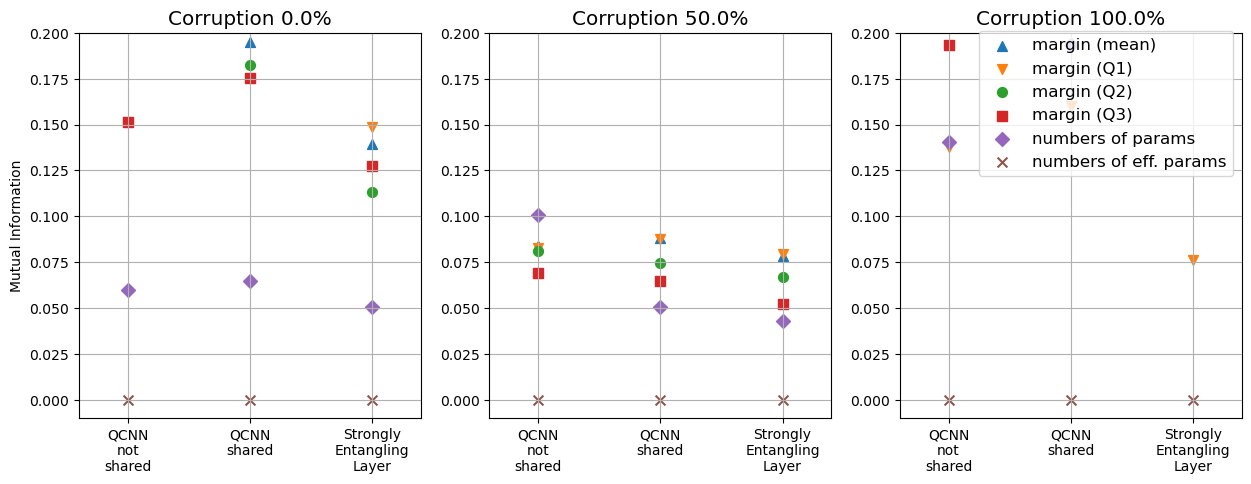

In [5]:
calc_method = 0
complexity_measure_indices = np.array([4, 6, 7, 8, 0, 1,])
complexity_measure_string = ["margin (mean)", "margin (Q1)", "margin (Q2)", "margin (Q3)", "numbers of params", "numbers of eff. params"]
plot_MI2(calc_method, complexity_measure_indices, complexity_measure_string)